# Instrucciones:
Ejercicio de twitter. Encontrar los 5 estados más felices de USA de acuerdo al análisis de sentimiento con AFFINN. 

Contenido. un fichero .ipynb con enunciado. Si no se hace completo indicad en un comentario lo que se ha conseguido Mostrar mapa USA con los estados coloreados por felicidad.

Realizar un mapa de España que permita ver dónde se tuitea y en qué idioma se tuitea.

##### Para el desarrollo de este trabajo me he basado en el siguiente tutorial: http://www.geomapik.com/desarrollo-programacion-gis/mapas-con-python-geopandas-matplotlib/

##### Donde he utilizado las librerías matplotlib y geopandas, usando el recurso que nos proporcionaban de la natalidad en españa ya que así contaba con la estructura del json formada y por tanto solo ha sido necesario borrar las columnas y adaptarlas a lo que requería este ejercicio que era obtener las provincias y coordenadas

In [1]:
import json
import csv
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry.multipolygon import MultiPolygon
from shapely.geometry.polygon import Polygon

natalidad = "natalidad.geojson"
map_data = gpd.read_file(natalidad)
map_data=map_data.drop(columns='NAME_1')
map_data=map_data.drop(columns='CC_2')
    
provincias = map_data['NAME_2']
coordenadas = map_data['geometry']

##### Se ha generado un output de 2gb para el analisis de este ejercicio

In [10]:
# función reciclada de ReadTweets.py adaptado para españa
def getCountrySpain(data):
    if data["place"] != None and data["place"]["country_code"] == "ES":
        return True
    else:
        return False

# función que hace uso de la librería shapely (que nos permite crear un poligono utilizando coordenadas) 
# para comprobar en que provincia esta contenido esa ciudad, ya que no olvidemos que pueden producirse tweets 
# en pueblos,etc
def getCheckProvincia(data):
    lista = []
    for i in range(0, len(data)):
        ciudad = data[i]
        lista.append(tuple(ciudad))
        
    ciudad = Polygon(lista)
    for i in range(0, len(coordenadas)):
        if coordenadas[i].contains(ciudad):
            return provincias[i] 
    return False


        
def readTweets():
    lenguaMasHablada = []
    with open("salidaTwitterSpain.txt", "r") as ins:
        for line in ins:          
            if ( len(line)> 1):
                data = json.loads(line)
                if "created_at" in data:
                    if getCountrySpain(data):
                            try:
                                provincia = getCheckProvincia(data["place"]["bounding_box"]["coordinates"][0])
                                idiomaUsado = data['lang']
                                if idiomaUsado != 'und':       
                                    # Categorización de los idiomas español = 0, inglés = 1,catalán = 2
                                    if idiomaUsado=='es':
                                        idiomaProvincias[provincia][0]+=1
                                        continue
                                    if idiomaUsado=='en':
                                        idiomaProvincias[provincia][1]+=1
                                        continue
                                    if idiomaUsado=='ca':
                                        idiomaProvincias[provincia][2]+=1
                                        continue
                            except:
                                pass
    
    
    for p in idiomaProvincias.values():
        lenguaMasHablada.append(p.index(max(p)))
        
    map_data['masHablado']=lenguaMasHablada
    map_data.head()
    
    # Tamaño mapa
    fig, ax = plt.subplots(figsize=(15, 15))
    #Etiquetas mapa
    ax.set_title('Categorización tweets por idioma en España', pad = 10,fontdict={'fontsize':20, 'color': '#9873ab'})
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    #Mapa
    map_data.plot(column='masHablado', cmap='plasma', ax=ax,legend=True, zorder=1)

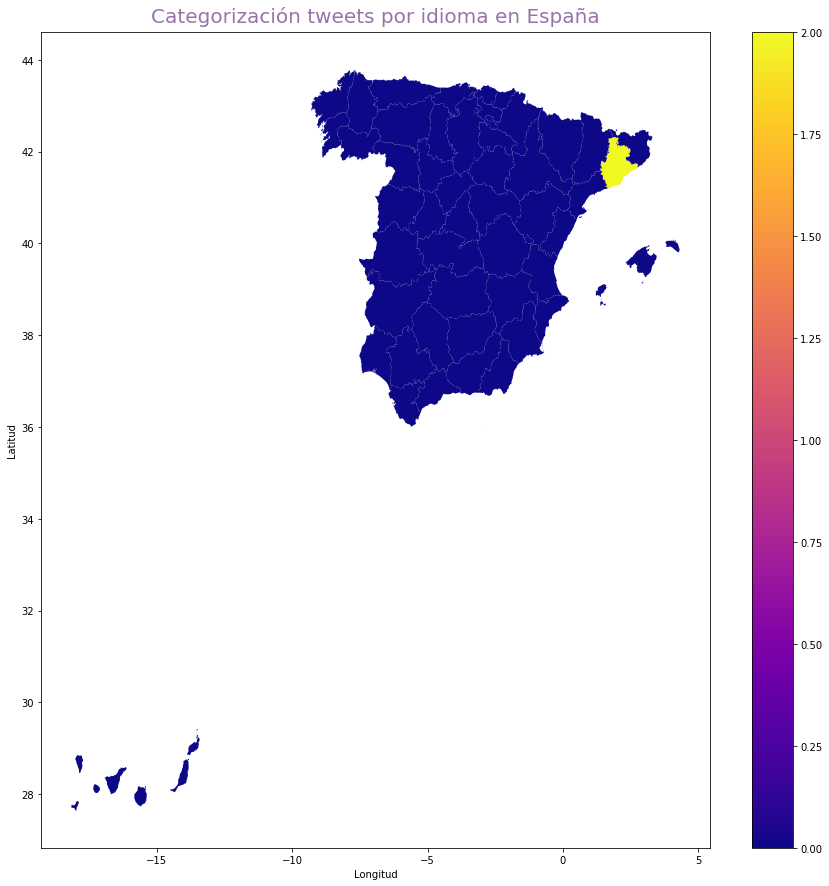

In [11]:
#lleno el diccionario con un valor distinto y luego hago la llamada a readTweets para que analize los tweets en cada lugar
idiomaProvincias = dict()
for provincia in provincias:
    idiomaProvincias[provincia] = [9, 9, 9]
readTweets()

#### Como se puede analizar detenidamente como conclusión se ha obtenido que la mayoría de tweets presentes en el territorio Español hacen uso del idioma nacional mayoritariamente, a excepción de alguna región en catalunya donde se utiliza el catalan.  